<a href="https://colab.research.google.com/github/edwin-nz/DeepLearning/blob/main/Minst-CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

GPUs Available:  1


# Import MNIST Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(y_train[:5])

img_rows=x_train[0].shape[0]
img_cols=x_test[0].shape[1]

X_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
X_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
[5 0 4 1 9]


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

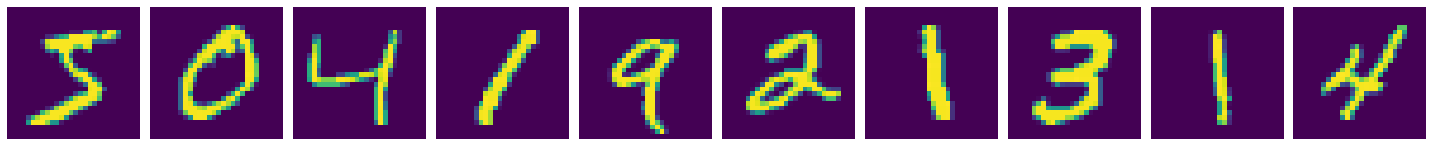

In [ ]:
plotImages(x_train[:10])

# Create a Convolutional Neural Network

In [ ]:
model = Sequential([
      Conv2D(32, (5,5), activation='relu', padding='same', input_shape=(28, 28, 1)),
      MaxPooling2D(pool_size=(2,2), padding='same'),
      Conv2D(32, (5,5), padding='same', activation='relu'),
      MaxPooling2D(pool_size=(2,2), padding='same'),
      Flatten(),
      Dense(1024, activation='relu'),
      Dropout(0.4),
      Dense(10)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1606656   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

# Compile the Neural Network

In [ ]:
model.compile(optimizer=Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy']
              )

# Train the Neural Network

In [ ]:
batch_size = 200
epochs = 10
steps_per_epoch = 54000 // batch_size
validation_steps = 6000 // batch_size

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    steps_per_epoch=steps_per_epoch,
                    validation_split=0.1, 
                    validation_steps=validation_steps
                    )

Epoch 1/10
270/270 [==============================] - 36s 16ms/step - loss: 1.0662 - sparse_categorical_accuracy: 0.8907 - val_loss: 0.0793 - val_sparse_categorical_accuracy: 0.9748
Epoch 2/10
270/270 [==============================] - 4s 15ms/step - loss: 0.0853 - sparse_categorical_accuracy: 0.9732 - val_loss: 0.0617 - val_sparse_categorical_accuracy: 0.9807
Epoch 3/10
270/270 [==============================] - 4s 15ms/step - loss: 0.0582 - sparse_categorical_accuracy: 0.9812 - val_loss: 0.0591 - val_sparse_categorical_accuracy: 0.9828
Epoch 4/10
270/270 [==============================] - 4s 15ms/step - loss: 0.0437 - sparse_categorical_accuracy: 0.9853 - val_loss: 0.0528 - val_sparse_categorical_accuracy: 0.9843
Epoch 5/10
270/270 [==============================] - 4s 15ms/step - loss: 0.0341 - sparse_categorical_accuracy: 0.9890 - val_loss: 0.0514 - val_sparse_categorical_accuracy: 0.9868
Epoch 6/10
270/270 [==============================] - 4s 15ms/step - loss: 0.0298 - sparse_cat

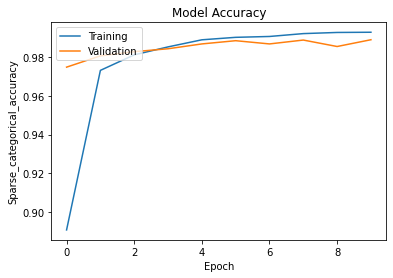

In [ ]:
# Plot the accuracy of the model during training
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Sparse_categorical_accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

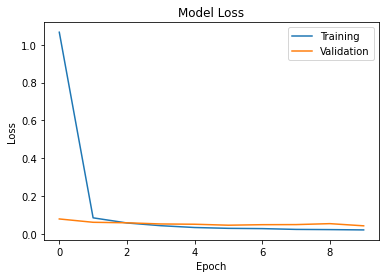

In [ ]:
# Plot the loss of the model during training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Evaluate the best model with testing data.
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 2s 5ms/step - loss: 0.0515 - sparse_categorical_accuracy: 0.9878
[0.051523566246032715, 0.9878000020980835]


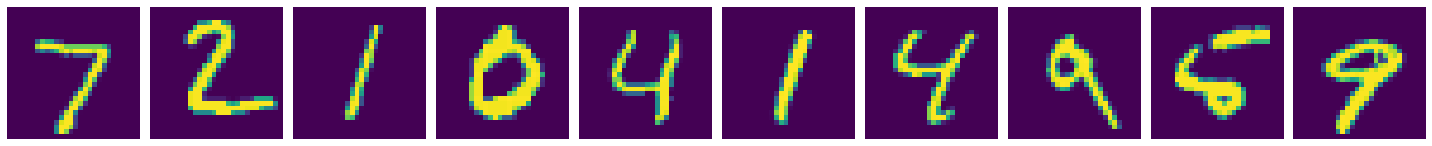

In [ ]:
plotImages(x_test[:10])

In [ ]:
predictions = np.argmax(model.predict(X_test[:10]), axis=-1)
print(predictions)

[7 2 1 0 4 1 4 9 5 9]
